In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
#load the data
data = pd.read_csv('raw_data/Global_Mobility_Report_Created_2020_07_07.csv')

/home/rich/miniconda3/envs/jupyter_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641616,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-01,NaN,NaN,NaN,NaN,-4.0,NaN
641617,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-02,NaN,NaN,NaN,NaN,-5.0,NaN
641618,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-03,NaN,NaN,NaN,NaN,2.0,NaN
641619,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-04,NaN,NaN,NaN,NaN,21.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641621 entries, 0 to 641620
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 640519 non-null  object 
 1   country_region                                      641621 non-null  object 
 2   sub_region_1                                        622595 non-null  object 
 3   sub_region_2                                        370478 non-null  object 
 4   iso_3166_2_code                                     233148 non-null  object 
 5   census_fips_code                                    370620 non-null  float64
 6   date                                                641621 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  490499 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   468614 non-n

In [5]:
data.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,370620.000000,490499.000000,468614.000000,291699.000000,341495.000000,626919.000000,355851.000000
mean,30342.420819,-21.896512,-5.499930,-0.565940,-26.311144,-23.732495,10.412040
std,15298.566753,28.576260,21.691874,55.093403,30.244293,20.664327,9.024861
min,1001.000000,-100.000000,-100.000000,-100.000000,-100.000000,-94.000000,-25.000000
25%,18109.000000,-41.000000,-16.000000,-36.000000,-50.000000,-37.000000,3.000000
50%,29105.000000,-18.000000,-2.000000,-7.000000,-24.000000,-25.000000,10.000000
75%,45059.000000,1.000000,7.000000,20.000000,-2.000000,-7.000000,16.000000
max,56045.000000,313.000000,378.000000,625.000000,497.000000,258.000000,56.000000


In [6]:
data["date"] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

In [7]:
all_ph_data = data[(data["country_region_code"]=="PH") & (data["sub_region_1"].isna())]

In [8]:
type(data["sub_region_1"].unique()[0])

float

In [9]:
(data["sub_region_1"].unique()[0])

nan

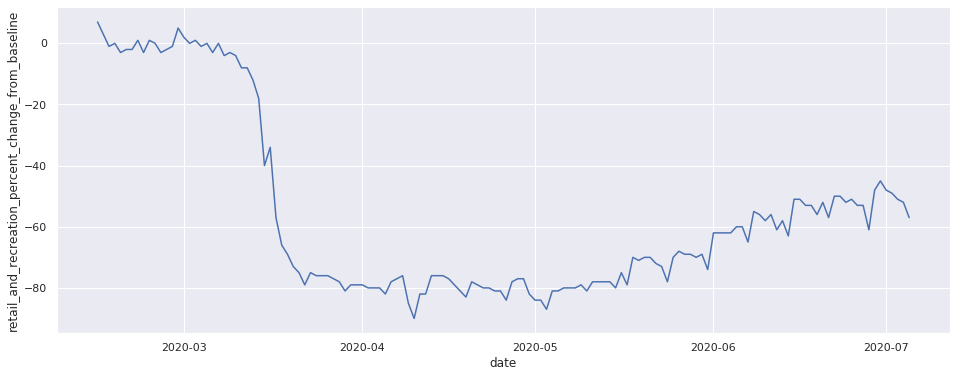

In [10]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="retail_and_recreation_percent_change_from_baseline", data=all_ph_data)

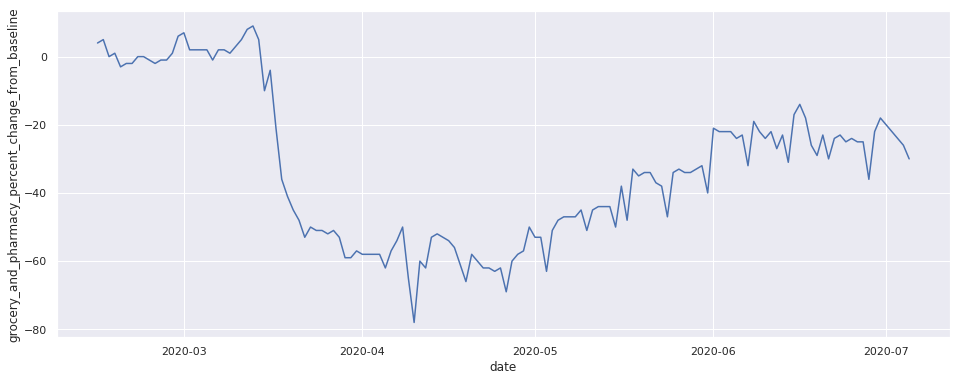

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline", data=all_ph_data)

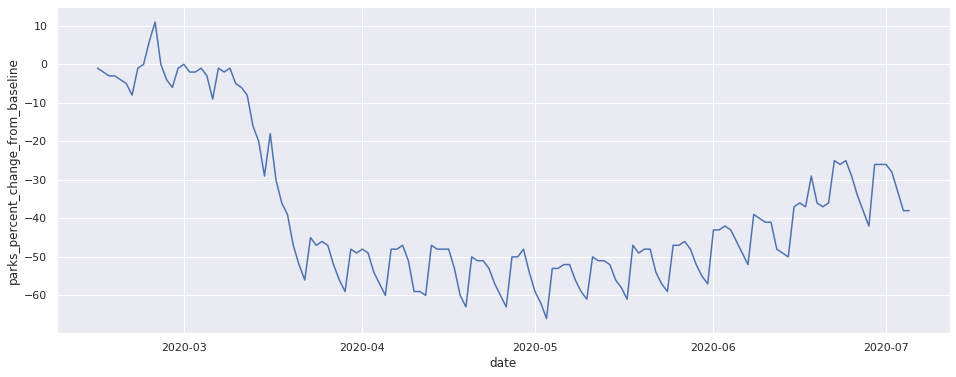

In [12]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="parks_percent_change_from_baseline", data=all_ph_data)

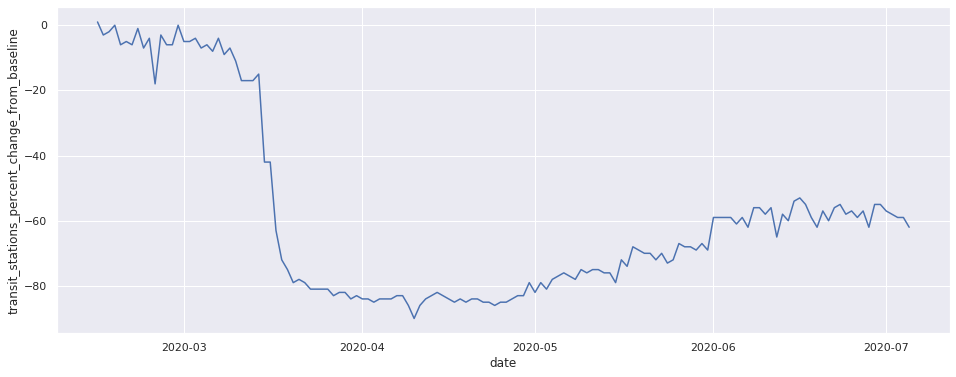

In [13]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline", data=all_ph_data)

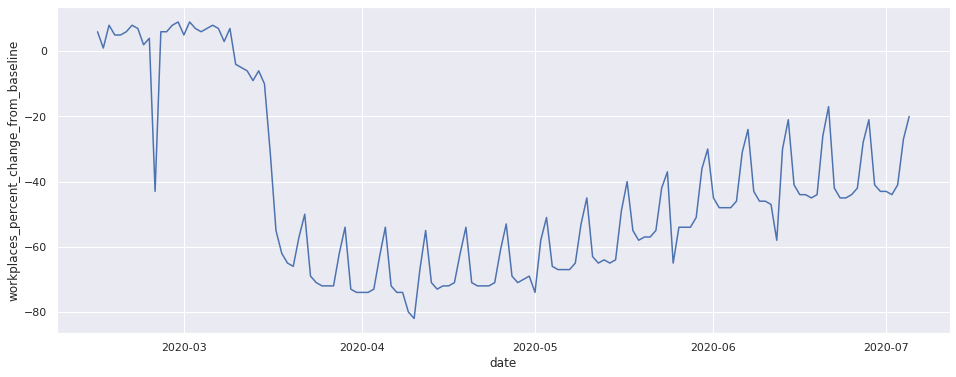

In [14]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="workplaces_percent_change_from_baseline", data=all_ph_data)

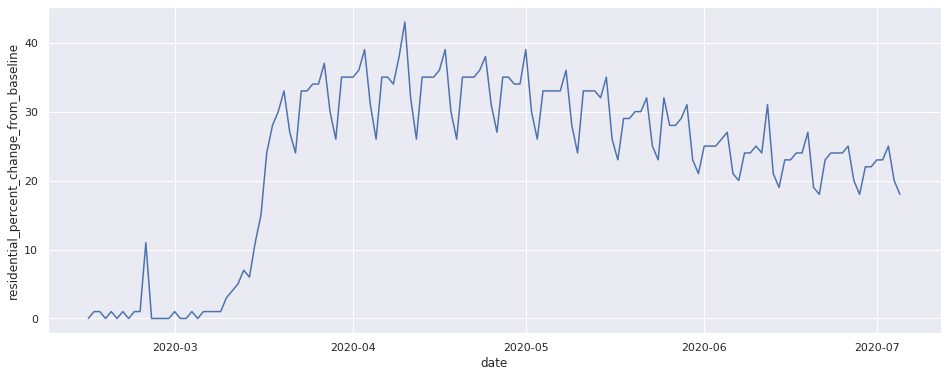

In [15]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="residential_percent_change_from_baseline", data=all_ph_data)

In [16]:
all_ph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 185676 to 185817
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 142 non-null    object        
 1   country_region                                      142 non-null    object        
 2   sub_region_1                                        0 non-null      object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     0 non-null      object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                142 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  142 non-null    float64       
 8   gr

In [17]:
all_ph_data.retail_and_recreation_percent_change_from_baseline.mean()

-55.86619718309859

In [18]:
all_ph_data.grocery_and_pharmacy_percent_change_from_baseline.mean()

-32.49295774647887

In [19]:
all_ph_data.parks_percent_change_from_baseline.mean()

-38.17605633802817

In [20]:
all_ph_data.transit_stations_percent_change_from_baseline.mean()

-58.49295774647887

In [21]:
all_ph_data.workplaces_percent_change_from_baseline.mean()

-43.04225352112676

In [24]:
all_ph_data.to_csv("processed_data/philippines_2020_07_07.csv", index=False)